In [33]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [34]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}



In [35]:
#Converte Fuel_Price para variação semanal
for (nstore in 1:45) {


    df[df$Store == nstore, "Fuel_Price"] = c(0, diff(df[df$Store == nstore, "Fuel_Price"]) / df[df$Store == nstore, "Fuel_Price"][-length(df[df$Store == nstore, "Fuel_Price"])]) * 100
    
}

In [36]:
head(df)

X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
1,1,2010-02-05,1643691,0,42.31,0.000000,211.0964,8.106,NA
2,1,2010-02-12,1641957,1,38.51,-0.933126,211.2422,8.106,0.06907348
3,1,2010-02-19,1611968,0,39.93,-1.334380,211.2891,8.106,0.02223661
4,1,2010-02-26,1409728,0,46.63,1.869531,211.3196,8.106,0.01443520
5,1,2010-03-05,1554807,0,46.50,2.499024,211.3501,8.106,0.01443311
6,1,2010-03-12,1439542,0,57.79,1.600000,211.3806,8.106,0.01443103


Estudando o efeito da preço do combustível

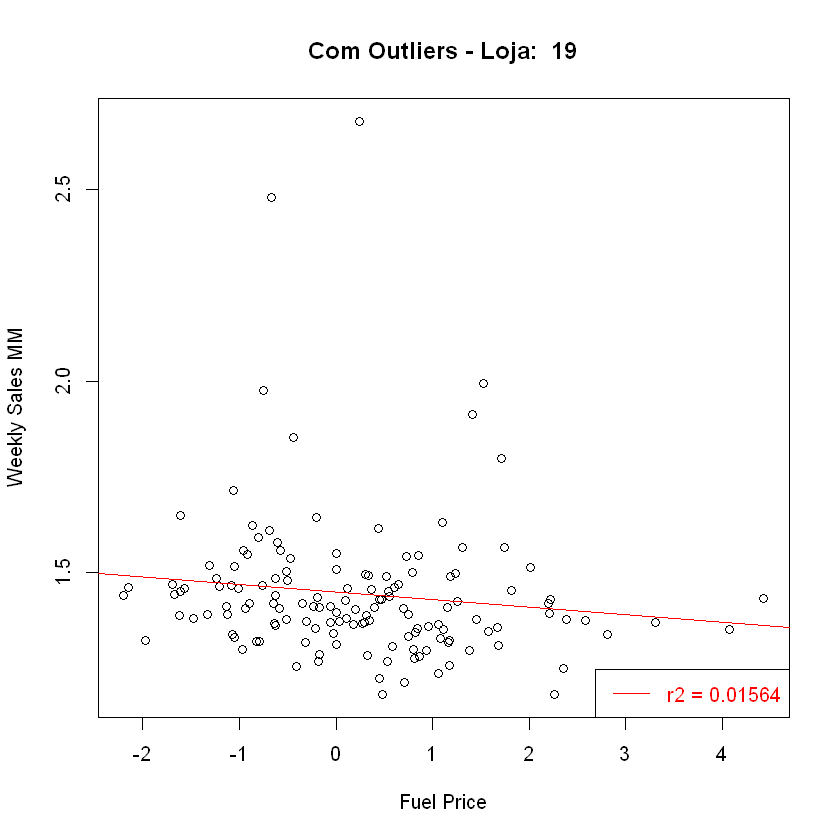

In [37]:
nstore = 19
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}


plot(dfplot$Fuel_Price	,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Fuel Price',
    main = paste( 'Com Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Fuel_Price	)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")


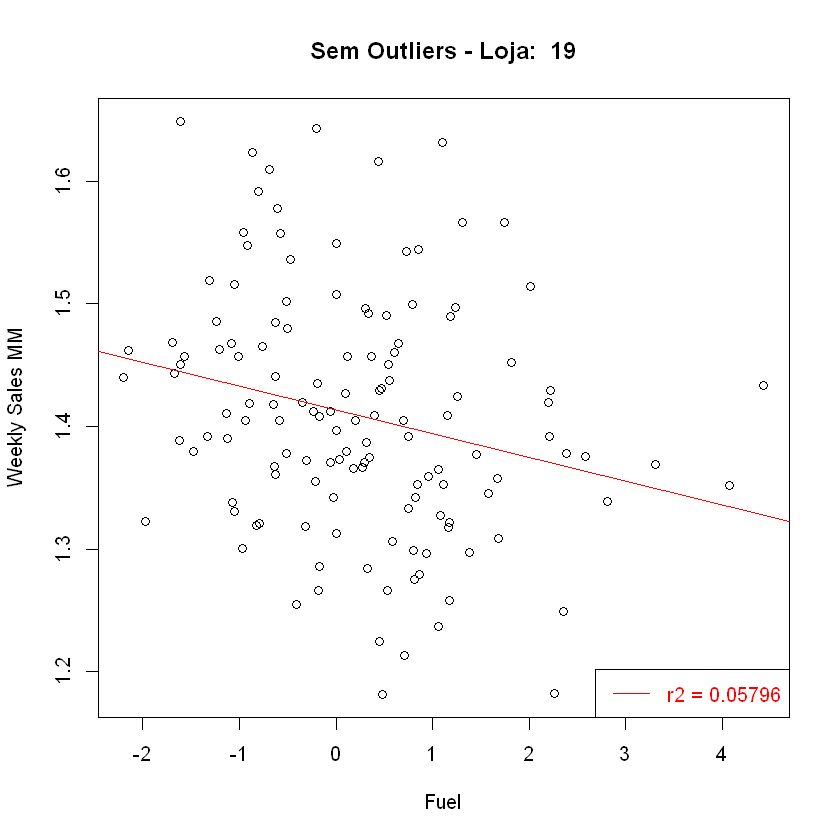

In [38]:
nstore = 19

# Calculate Q1, Q3, and IQR
if (nstore > 0){
    Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
    Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
    } else {
    Q1 <- quantile(df$Weekly_Sales, 0.25)
    Q3 <- quantile(df$Weekly_Sales, 0.75) 
    }

IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

if (nstore > 0){
   dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
} else {
    dfplot = dfplot = df[(df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
}



plot(dfplot$Fuel_Price	,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Fuel',
    main = paste( 'Sem Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~dfplot$Fuel_Price	)
abline(lm_model, col="red")
r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")


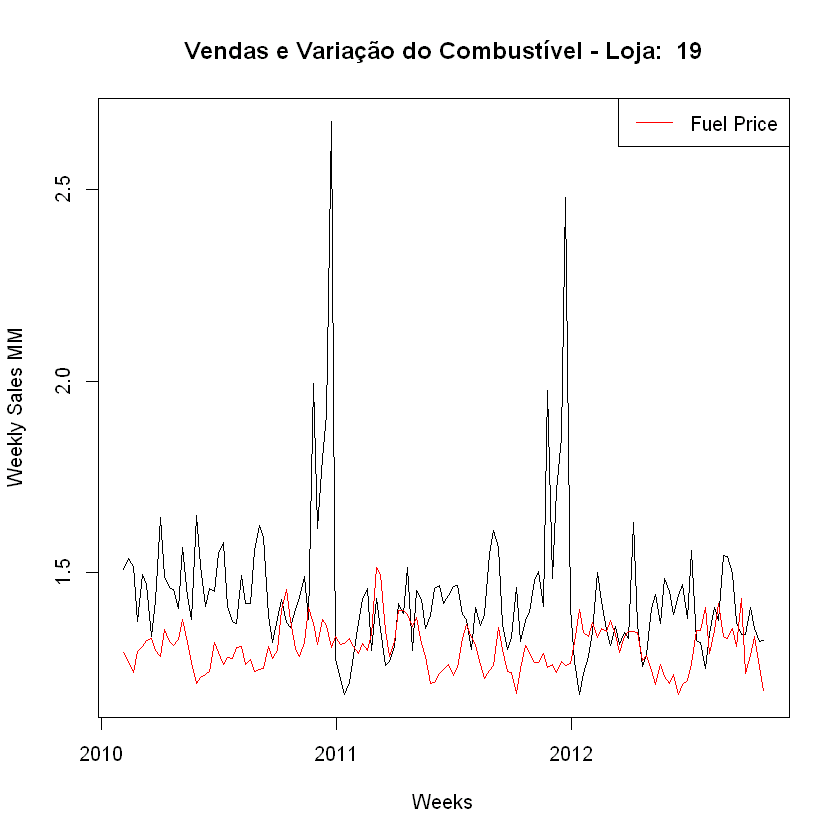

In [39]:
dfplot = df[(df$Store == nstore),]

minF = min(dfplot[dfplot$Store == nstore,]$Fuel_Price/20)
minS =  min(dfplot[dfplot$Store == nstore,]$Weekly_Sales/1000000)
minD = minF - minS


plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Weeks',
    main = paste( 'Vendas e Variação do Combustível - Loja: ', nstore))
lines(dfplot$Date,(dfplot$Fuel_Price/20)-minD,
      col = "red")
legend("topright", legend="Fuel Price", lty=1, col="red", text.col="black")


A correlação direta entre o preço do combustível e as vendas é fraca. 
Agora será verificada am distribuição de vendas por quartis de preço.

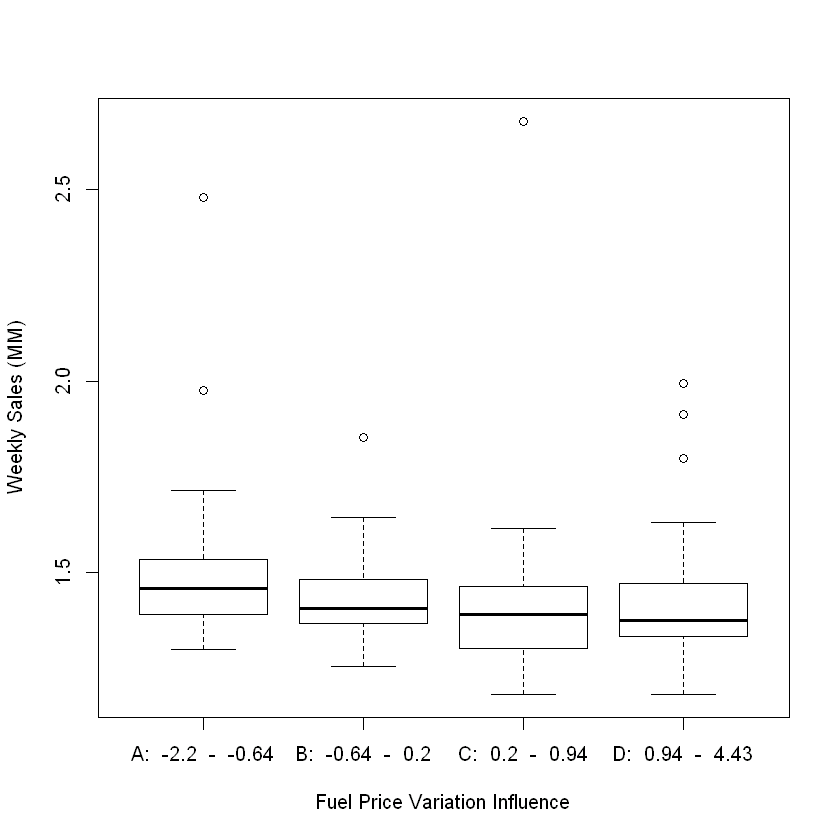

In [40]:
Q0_Fuel = min(dfplot[dfplot$Store == nstore,]$Fuel_Price)
Q1_Fuel = quantile(dfplot[dfplot$Store == nstore,]$Fuel_Price, 0.25)
Q2_Fuel = quantile(dfplot[dfplot$Store == nstore,]$Fuel_Price, 0.50)
Q3_Fuel = quantile(dfplot[dfplot$Store == nstore,]$Fuel_Price, 0.75)
Q4_Fuel = max(dfplot[dfplot$Store == nstore,]$Fuel_Price)
dfplot$Fuel_Quantile = ''

label_1 = paste("A: ",round(Q0_Fuel, 2)," - ",round(Q1_Fuel, 2))
label_2 = paste("B: ",round(Q1_Fuel, 2)," - ",round(Q2_Fuel, 2))
label_3 = paste("C: ",round(Q2_Fuel, 2)," - ",round(Q3_Fuel, 2))
label_4 = paste("D: ",round(Q3_Fuel, 2)," - ",round(Q4_Fuel, 2))

dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price <= Q1_Fuel,label_1, dfplot$Fuel_Quantile)
dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price > Q1_Fuel & dfplot$Fuel_Price <= Q2_Fuel ,label_2, dfplot$Fuel_Quantile)
dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price > Q2_Fuel & dfplot$Fuel_Price <= Q3_Fuel ,label_3, dfplot$Fuel_Quantile)
dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price > Q3_Fuel,label_4, dfplot$Fuel_Quantile)

bp = boxplot(Weekly_Sales/1000000 ~ Fuel_Quantile, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Fuel Price Variation Influence'
       )


Ao contrário do preço nominal, a variação semanal do preço do combustível 
impacta o volume de vendas, com valores negativos de variação estando 
associados às maiores vendas.


In [41]:
print(bp$stats)

         [,1]     [,2]     [,3]     [,4]
[1,] 1.300376 1.255087 1.181205 1.182199
[2,] 1.390957 1.366285 1.302363 1.332856
[3,] 1.457330 1.406592 1.391580 1.376110
[4,] 1.533371 1.482499 1.464122 1.470784
[5,] 1.713769 1.642970 1.615988 1.631738
